In [11]:
%load_ext autoreload
%autoreload 2

import os; import sys; sys.path.append('..')
import gp
import gp.nets as nets

from nolearn.lasagne.visualize import plot_loss
from nolearn.lasagne.visualize import plot_conv_weights
from nolearn.lasagne.visualize import plot_conv_activity
from nolearn.lasagne.visualize import plot_occlusion

from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
PATCH_PATH = ('cylinder2_rgb_small')

In [3]:
X_train, y_train, X_test, y_test = gp.Patch.load_rgb(PATCH_PATH)

Loaded /n/home05/haehn/patches_local//cylinder2_rgb_small/ in 0.363067865372 seconds.


IndexError: index 3 is out of bounds for axis 0 with size 3

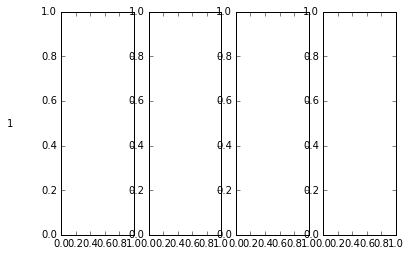

In [4]:
gp.Util.view_rgba(X_train[100], y_train[100])

In [5]:
cnn = nets.RGBNet()

CNN configuration: 
    Our CNN with image, prob, merged_array as RGB.

    This includes dropout.
    


In [6]:
cnn = cnn.fit(X_train, y_train)

# Neural Network with 7133490 learnable parameters

## Layer information

  #  name      size
---  --------  --------
  0  input     3x75x75
  1  conv1     64x73x73
  2  pool1     64x36x36
  3  dropout1  64x36x36
  4  conv2     48x34x34
  5  pool2     48x17x17
  6  dropout2  48x17x17
  7  hidden3   512
  8  dropout3  512
  9  output    2

  epoch    trn loss    val loss    trn/val    valid acc  dur
-------  ----------  ----------  ---------  -----------  ------
      1     0.29937     0.21259    1.40821      0.92022  15.90s
      2     0.20038     0.17638    1.13608      0.93562  15.75s
      3     0.15791     0.14031    1.12545      0.94796  15.76s
      4     0.12245     0.10854    1.12817      0.96173  15.76s
      5     0.09646     0.08579    1.12430      0.97200  15.79s
      6     0.07258     0.07912    0.91729      0.97452  15.86s
      7     0.05239     0.06379    0.82127      0.98145  15.86s
      8     0.04547     0.05172    0.87917      0.98559  15.86s
      9     0.03323   

In [7]:
test_accuracy = cnn.score(X_test, y_test)

In [8]:
test_accuracy

0.905511811023622

<module 'matplotlib.pyplot' from '/n/home05/haehn/nolearncox/lib/python2.7/site-packages/matplotlib-1.5.2-py2.7-linux-x86_64.egg/matplotlib/pyplot.pyc'>

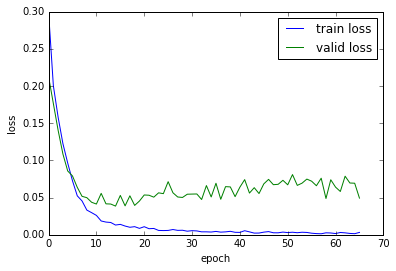

In [12]:
plot_loss(cnn)